In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("amazon_reviews.csv")

In [4]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


<AxesSubplot:xlabel='label', ylabel='count'>

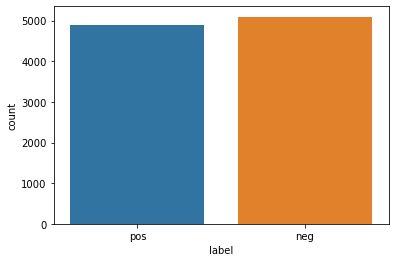

In [5]:
sns.countplot(df["label"])

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import tokenize

In [7]:
df.review=df.review.apply(lambda x: x.lower())
df.review[0]

'stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'

In [8]:
import string

def remove_punc(text):
    for i in string.punctuation:
        text=text.replace(i,' ')
    
    return text

df.review=df.review.apply(remove_punc)

In [9]:
df.review[0]

'stuning even for the non gamer  this sound track was beautiful  it paints the senery in your mind so well i would recomend it even to people who hate vid  game music  i have played the game chrono cross but out of all of the games i have ever played it has the best music  it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras  it would impress anyone who cares to listen     '

In [10]:
nltk.download('stopwords')
stopword_list=stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
print(stopword_list)

df.review=df.review.apply(lambda x : " ".join(x for x in x.split() if x not in stopword_list))
df['review'][0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', 'very',

'stuning even non gamer sound track beautiful paints senery mind well would recomend even people hate vid game music played game chrono cross games ever played best music backs away crude keyboarding takes fresher step grate guitars soulful orchestras would impress anyone cares listen'

In [11]:
nltk.download('punkt')
df['review']=df.review.apply(word_tokenize)
df['review'][0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['stuning',
 'even',
 'non',
 'gamer',
 'sound',
 'track',
 'beautiful',
 'paints',
 'senery',
 'mind',
 'well',
 'would',
 'recomend',
 'even',
 'people',
 'hate',
 'vid',
 'game',
 'music',
 'played',
 'game',
 'chrono',
 'cross',
 'games',
 'ever',
 'played',
 'best',
 'music',
 'backs',
 'away',
 'crude',
 'keyboarding',
 'takes',
 'fresher',
 'step',
 'grate',
 'guitars',
 'soulful',
 'orchestras',
 'would',
 'impress',
 'anyone',
 'cares',
 'listen']

In [12]:
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
df['review']=df.review.apply(lambda x:[lemmatizer.lemmatize(word) for word in x])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\irfan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
df.review= df.review.astype(str)

In [14]:
x = df.iloc[:,1].values 
y = df.iloc[:,0].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [16]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train_tfidf,y_train)

y_pred=clf.predict(x_test_tfidf)
print(y_pred, y_test)

['neg' 'pos' 'neg' ... 'neg' 'neg' 'pos'] ['neg' 'pos' 'neg' ... 'pos' 'neg' 'pos']


In [17]:
y_pred=clf.predict(x_test_tfidf)
print(y_pred, y_test)

['neg' 'pos' 'neg' ... 'neg' 'neg' 'pos'] ['neg' 'pos' 'neg' ... 'pos' 'neg' 'pos']


In [18]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print()
print(accuracy_score(y_pred,y_test))


0.8796


In [19]:
message=["Congratulations on building your first Sentiment Analysis model! You're going great!"]
message=tfidf.transform(message).toarray()
clf.predict(message)[0]

'pos'

In [20]:
message1=["you are not deserved"]
message1=tfidf.transform(message1).toarray()
clf.predict(message1)[0]

'neg'

In [21]:
message2=["you are doing fabulous"]
message2=tfidf.transform(message2).toarray()
clf.predict(message2)[0]

'pos'